JSC270H1 S

Warren Zhu

<a href="https://colab.research.google.com/github/larunerdman/JSC270_Assg2/blob/main/JSC270_Assignment2_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Importing data

In [2]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

#Initial Data Exploration:


###Question 1:

####Code:

In [ ]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
income94.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
income94['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [ ]:
income94['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

####Text:

The [text description of the data](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.name) explicitly states that:
1. **age**, **fnlwgt**, **education_num**, **capital-gain**, **capital-loss**, **hours-per-week** are **continuous** variables.
2. **workclass**, **education**, **marital-status**, **occupation**, **relationship**, **race**, **sex**, **native-country**, **gross_income_group** are **categorical** variables.

For the most part, these descriptions match the output of our command "income94.info()". However, it is crucial to have a closer look at education_num, as it is actually not a continuous variable. All it actually does is it stores a numerical label that is equivalent to the value stored in education_num. This can be seen in rows 0, 1, and 4 of our output of "income94.head()".

###Question 2:

####Code (for representation):

In [ ]:
income94.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
income94['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
income94['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
income94['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [ ]:
income94['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
income94['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
income94['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [ ]:
income94['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
income94['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [ ]:
income94['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
income94['gross_income_group'].unique()

array([' <=50K', ' >50K'], dtype=object)

####Text (for representation):

By looking at the unique values (i.e., the output of our ".unique()" function) for our categorical variables, and the first few datapoints (i.e.,output of the ".head(20)" function) of our dataframe, we can see that the missing values for:
1. **age** does not appear to have missing values.
2. **workclass** is represented by a '?'.
3. **fnlwgt** does not appear to have missing values.
4. **education** does not appear to have missing values.
5. **education_num** does not appear to have missing values.
6. **marital_status**  does not appear to have missing values.
7. **occupation** is represented by a '?'.
8. **relationship** does not appear to have missing values.
9. **race** does not appear to have missing values.
10. **sex** does not appear to have missing values.
11. **capital_gain** *may* have some missing values. If this is the case, it is represented with a '0'. See the note below.
12. **capital_loss** *may* to have some missing values. If this is the case, it is represented with a '0'. See the note below.
13. **hours_per_week** does not appear to be missing values.
14. **native_country** is represented by a '?'.
15. **gross_income_group** does not appear to have missing values.

**[NOTE:]**
Note that capital_loss and capital_gain are two odd variables that are intertwined--if capital_loss is nonzero, then capital_gain is guaranteed to be zero, and vice versa. There are certain data points that happen to have 0 for both though--this *may* represent that the capital hasn't changed, but it could also represent that there's missing data. For now, we'll just assume it's the first case.

####Code (for casting and counting):

In [3]:
## First, let's cast.

## We will create a new dataframe for the data.
## This was done because there was a bug that prevented replace from otherwise working properly
## Source: https://stackoverflow.com/questions/29247712/how-to-replace-a-value-in-pandas-with-nan

income_v2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, sep=',\s')

## Set the columns

income_v2.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

## Now use the replace function
income_v2.replace('?', np.nan, inplace = True)

##Double check to see if it worked
income_v2.head(20)

##We can see it did from observation 14's 'native_country' value!

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
## Let's now determine the number of missing variables in each column
income_v2.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

####Text (for casting and counting):

There are 1836 missing values in the 'workclass' column, 1843 missing values in the 'occupation' column, and 583 missing values in the 'native_country' column. Other than that, all values appear to be there.

###Question 3

####Code (for individual plots):

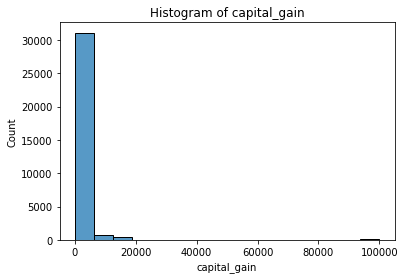

In [7]:
## First plot capital_gain. Let's do a Histogram first.
sns.histplot(x = 'capital_gain', data = income_v2)
plt.xlabel('capital_gain')
plt.title('Distribution of capital_gain')
plt.show()

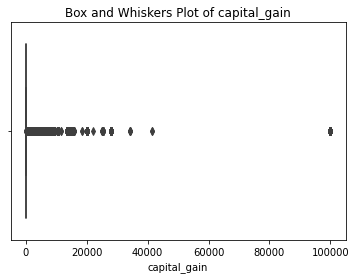

In [8]:
## Now let's look at a Boxplot
sns.boxplot(x = 'capital_gain', data = income_v2)
plt.xlabel('capital_gain')
plt.title('Distribution of capital_gain')
plt.show()


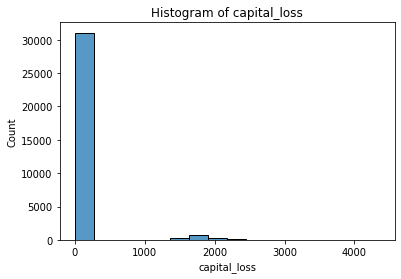

In [9]:
## Plot capital_loss. Let's do a Histogram first.
sns.histplot(x = 'capital_loss', data = income_v2)
plt.xlabel('capital_loss')
plt.title('Distribution of capital_loss')
plt.show()

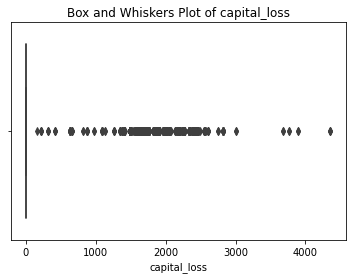

In [10]:
## Now let's look at a Boxplot
sns.boxplot(x = 'capital_loss', data = income_v2)
plt.xlabel('capital_loss')
plt.title('Distribution of capital_loss')
plt.show()


####Text (for what needs to change and why):

As mentioned in Question 2, capital_loss and capital_gain are intertwined--if capital_loss is non-zero, then capital_gain will be zero. Likewise, if capital_gain is non-zero, then capital_loss will be zero. This is because if you lose capital overall, you cannot gain capital, and vice versa. Ergo, there are a lot of 0s in the distributions above. As such, there should be a new variable that replaces these two--change_in_capital. This variable should hold positive values whenever there is a gain in capital, a negative value whenever there is a loss in capital, and zero when capital is neither gained nor lost (i.e., capital remains the same).

####Code (for new plots):

In [18]:
##Introduce the new variable
income_v2['change_in_capital']= income_v2['capital_gain'] - income_v2['capital_loss']
##Remove the odd variables
income_v2 = income_v2.drop(columns=['capital_gain','capital_loss'])

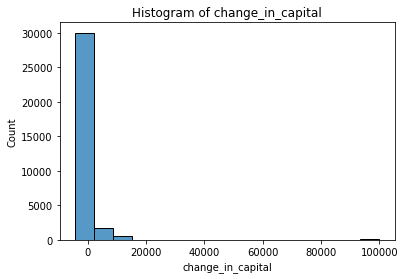

In [19]:
## Let's do a Histogram first.
sns.histplot(x = 'change_in_capital', data = income_v2)
plt.xlabel('change_in_capital')
plt.title('Distribution of change_in_capital')
plt.show()

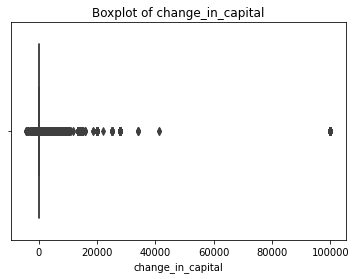

In [27]:
## Let's do a boxplot next
sns.boxplot(x = 'change_in_capital', data = income_v2)
plt.xlabel('change_in_capital')
plt.title('Distribution of change_in_capital')
plt.show()

In [16]:
## Briefly examine the summary statistics.
income_v2['change_in_capital'].describe()

count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: change_in_capital, dtype: float64

###Question 4

####Code (for overall distribution):

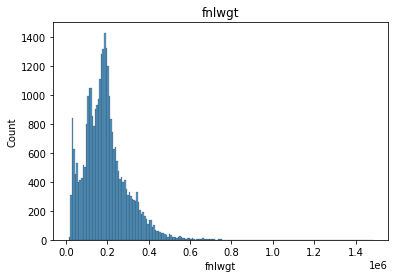

In [20]:
## Let's do a Histogram first.
sns.histplot(x = 'fnlwgt', data = income_v2)
plt.xlabel('fnlwgt')
plt.title('Distribution of fnlwgt')
plt.show()

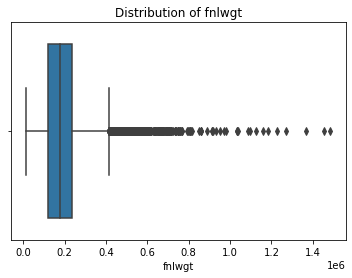

In [28]:
## Let's do a Histogram first.
sns.boxplot(x = 'fnlwgt', data = income_v2)
plt.xlabel('fnlwgt')
plt.title('Distribution of fnlwgt')
plt.show()

In [21]:
## Briefly examine the summary statistics.
income_v2['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

####Text (for overall distribution):

The distribution is not symmetric--it is right-skewed.

####Code (for distribution for men/women):

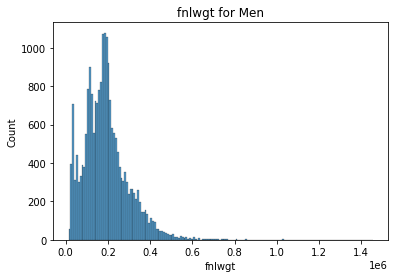

In [26]:
## Make a Histogram for men first.
sns.histplot(x = 'fnlwgt', data = income_v2.loc[income_v2['sex'] == 'Male'])
plt.xlabel('fnlwgt')
plt.title('Distribution of fnlwgt for Men')
plt.show()

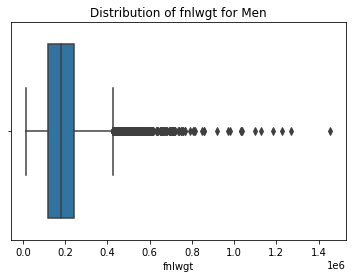

In [29]:
## Boxplot for Men
sns.boxplot(x = 'fnlwgt', data = income_v2.loc[income_v2['sex'] == 'Male'])
plt.xlabel('fnlwgt')
plt.title('Distribution of fnlwgt for Men')
plt.show()

In [31]:
## Get some summary statistics for Men
income_v2.loc[income_v2['sex'] == 'Male']['fnlwgt'].describe()

count    2.179000e+04
mean     1.917714e+05
std      1.067407e+05
min      1.376900e+04
25%      1.182008e+05
50%      1.801400e+05
75%      2.411462e+05
max      1.455435e+06
Name: fnlwgt, dtype: float64

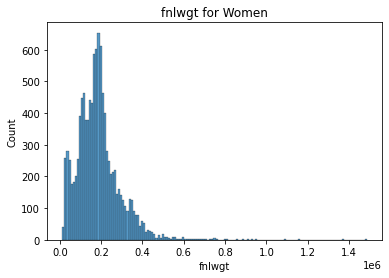

In [25]:
## Now, make a Histogram for women.
sns.histplot(x = 'fnlwgt', data = income_v2.loc[income_v2['sex'] == 'Female'])
plt.xlabel('fnlwgt')
plt.title('Distribution of fnlwgt for Women')
plt.show()

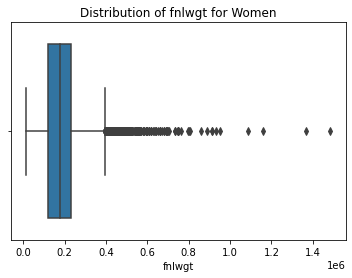

In [32]:
## Boxplot for women.
sns.boxplot(x = 'fnlwgt', data = income_v2.loc[income_v2['sex'] == 'Female'])
plt.xlabel('fnlwgt')
plt.title('Distribution of fnlwgt for Women')
plt.show()

In [33]:
## Get some summary statistics for Women
income_v2.loc[income_v2['sex'] == 'Female']['fnlwgt'].describe()

count    1.077100e+04
mean     1.857463e+05
std      1.029861e+05
min      1.228500e+04
25%      1.173630e+05
50%      1.760770e+05
75%      2.283315e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

####Text (for distribution for men/women):

As shown above, the two distributions are very similar. Due to our fairly big sample size, I believe outliers should be included for now, so that we can have a better idea of how they play out with the rest of the data.

#Correlation:

###Part A:

####Code:

In [34]:
income_v2.corr()

,age,fnlwgt,education_num,hours_per_week,change_in_capital
age,1.000000,-0.076646,0.036527,0.068756,0.074284
fnlwgt,-0.076646,1.000000,-0.043195,-0.018768,0.000988
education_num,0.036527,-0.043195,1.000000,0.148123,0.117891
hours_per_week,0.068756,-0.018768,0.148123,1.000000,0.075207
change_in_capital,0.074284,0.000988,0.117891,0.075207,1.000000


####Text:

The correlations between age, hours_per_week and change_in_capital all appear to be very weak. None of the variables seem to correlated.

###Part B:

####Code:

In [50]:
##Here, we used code outlined by from here: https://stackoverflow.com/questions/52741236/how-to-calculate-p-values-for-pairwise-correlation-of-columns-in-pandas
##All this does is it displays the significance of the correlation between each of the two variables

from scipy.stats import pearsonr
def pearsonr_pval(x,y):
  return pearsonr(x,y)[1]
income_v2.corr(method=pearsonr_pval)

,age,fnlwgt,education_num,hours_per_week,change_in_capital
age,1.000000e+00,1.266170e-43,4.305718e-11,2.011286e-35,4.475816e-41
fnlwgt,1.266170e-43,1.000000e+00,6.306191e-15,7.069233e-04,8.584968e-01
education_num,4.305718e-11,6.306191e-15,1.000000e+00,4.236647e-159,4.183839e-101
hours_per_week,2.011286e-35,7.069233e-04,4.236647e-159,1.000000e+00,4.617740e-42
change_in_capital,4.475816e-41,8.584968e-01,4.183839e-101,4.617740e-42,1.000000e+00


In [63]:
## Doing a regression test just to make sure StackOverflow didn't lie to me :p
rega = smf.ols('hours_per_week ~ education_num', data = income_v2).fit()
print(rega.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     730.4
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          4.24e-159
Time:                        07:34:56   Log-Likelihood:            -1.2768e+05
No. Observations:               32561   AIC:                         2.554e+05
Df Residuals:                   32559   BIC:                         2.554e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.2711      0.274    121.575

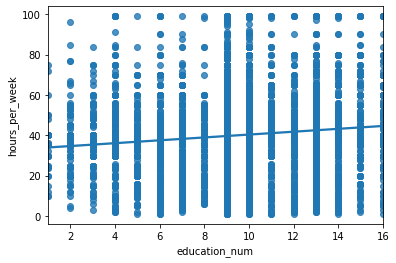

In [43]:
##A Boxplot for each value of education_num would do a better job here, but as we've already found the tests, that (and the plot below)
##Would actually just be extra work
sns.regplot(x='education_num', y='hours_per_week', data=income_v2)

####Text:

The only pair with a correlation coefficient larger than 0.1 or less than -0.1 is education_num and hours_per_week. After testing, we see that the relationship is very significant, so there appears to be a relationship between education_num and hours_per_week. Futhermore, the direction of the correlation seems to indicate that the higher your education is, the more hours per week you work (we know this because the correlation is positive). I personally find this surprising, as I thought that people who were better educated would work less.

###Part C:

####Code:

In [44]:
## This is for Women:
## (This is correlation!)
income_v2.loc[income_v2['sex'] == 'Female'].corr()

,age,fnlwgt,education_num,hours_per_week,change_in_capital
age,1.000000,-0.054676,-0.017899,0.081257,0.053421
fnlwgt,-0.054676,1.000000,-0.039808,0.006913,-0.000460
education_num,-0.017899,-0.039808,1.000000,0.178749,0.072229
hours_per_week,0.081257,0.006913,0.178749,1.000000,0.027204
change_in_capital,0.053421,-0.000460,0.072229,0.027204,1.000000


In [51]:
## This is also for Women
## (This is significance!)
income_v2.loc[income_v2['sex'] == 'Female'].corr(method=pearsonr_pval)

,age,fnlwgt,education_num,hours_per_week,change_in_capital
age,1.000000e+00,1.362674e-08,6.322895e-02,3.010200e-17,2.896799e-08
fnlwgt,1.362674e-08,1.000000e+00,3.587303e-05,4.731590e-01,9.618907e-01
education_num,6.322895e-02,3.587303e-05,1.000000e+00,4.966599e-78,6.138844e-14
hours_per_week,3.010200e-17,4.731590e-01,4.966599e-78,1.000000e+00,4.750226e-03
change_in_capital,2.896799e-08,9.618907e-01,6.138844e-14,4.750226e-03,1.000000e+00


In [64]:
## Just to be on the safe side...
regb = smf.ols('age ~ education_num', data = income_v2.loc[income_v2['sex'] == 'Female']).fit()
print(regb.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.451
Date:                Mon, 08 Feb 2021   Prob (F-statistic):             0.0632
Time:                        07:36:53   Log-Likelihood:                -43717.
No. Observations:               10771   AIC:                         8.744e+04
Df Residuals:                   10769   BIC:                         8.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        37.9159      0.585     64.799

In [45]:
## This is for Men:
## (This is correlation!)
income_v2.loc[income_v2['sex'] == 'Male'].corr()

,age,fnlwgt,education_num,hours_per_week,change_in_capital
age,1.000000,-0.091810,0.060486,0.034124,0.078558
fnlwgt,-0.091810,1.000000,-0.045174,-0.040739,-0.000189
education_num,0.060486,-0.045174,1.000000,0.136782,0.131371
hours_per_week,0.034124,-0.040739,0.136782,1.000000,0.079601
change_in_capital,0.078558,-0.000189,0.131371,0.079601,1.000000


In [52]:
## This is also for Men
## (This is significance!)
income_v2.loc[income_v2['sex'] == 'Male'].corr(method=pearsonr_pval)

,age,fnlwgt,education_num,hours_per_week,change_in_capital
age,1.000000e+00,5.236786e-42,4.022987e-19,4.693983e-07,3.513598e-31
fnlwgt,5.236786e-42,1.000000e+00,2.535155e-11,1.790163e-09,9.777572e-01
education_num,4.022987e-19,2.535155e-11,1.000000e+00,1.734252e-91,1.767464e-84
hours_per_week,4.693983e-07,1.790163e-09,1.734252e-91,1.000000e+00,5.686147e-32
change_in_capital,3.513598e-31,9.777572e-01,1.767464e-84,5.686147e-32,1.000000e+00


In [66]:
## Just to be on the safe side...
regc = smf.ols('age ~ education_num', data = income_v2.loc[income_v2['sex'] == 'Male']).fit()
print(regc.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     80.01
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           4.02e-19
Time:                        08:30:29   Log-Likelihood:                -87381.
No. Observations:               21790   AIC:                         1.748e+05
Df Residuals:                   21788   BIC:                         1.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.3649      0.355    102.499

####Text:

The correlation between education_num and age is stronger for men(0.060486) than for women(-0.017899). As expected, the significance of the correlation between education_num and age is also stronger for men(p=4.022987e-19) than for women(p=6.322895e-2) (we didn't need to test for this, it would have followed by definition). However, note the direction of correlation for women is negative, whilst the direction of correlation for men is positive! These findings can be explained as follows: in the past, due to tradition, more men went to pursue higher education. As such, the direction of correlation between the two variables for women is negative, as the older women were from another time period. Furthermore, the correlation between the two variables for women was weaker than that of men, as the changing of such traditions had more effect on women than on women.

###Part D:

####Code:

In [55]:
income_v2['weighted_education_num']=income_v2['fnlwgt']*income_v2['education_num']
income_v2['weighted_hours_per_week']=income_v2['fnlwgt']*income_v2['hours_per_week']
##First, check the unweighted case
income_v2.cov()

,age,fnlwgt,education_num,hours_per_week,change_in_capital,weighted_education_num,weighted_hours_per_week
age,1.860614e+02,-1.103507e+05,1.281849e+00,1.158013e+01,7.507258e+03,-7.606371e+05,-2.297511e+06
fnlwgt,-1.103507e+05,1.114080e+10,-1.172953e+04,-2.446043e+04,7.726928e+05,1.087517e+11,4.446174e+11
education_num,1.281849e+00,-1.172953e+04,6.618890e+00,4.705338e+00,2.247151e+03,1.178453e+06,4.066383e+05
hours_per_week,1.158013e+01,-2.446043e+04,4.705338e+00,1.524590e+02,6.880078e+03,6.343728e+05,2.678528e+07
change_in_capital,7.507258e+03,7.726928e+05,2.247151e+03,6.880078e+03,5.489309e+07,4.424141e+08,1.430658e+09
weighted_education_num,-7.606371e+05,1.087517e+11,1.178453e+06,6.343728e+05,4.424141e+08,1.390253e+12,4.558904e+12
weighted_hours_per_week,-2.297511e+06,4.446174e+11,4.066383e+05,2.678528e+07,1.430658e+09,4.558904e+12,2.450618e+13


####Text:

We can see that the unweighted variance and covariance between education_num and hours_per_week is much lower than the weighted variance and covariance between education_num and hours_per_week.

#Regression:

## Code (for Initial Regression Model):


In [58]:
reg1 = smf.ols('hours_per_week ~ sex', data = income_v2).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:23:36   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.4104      0.116    314.412      

## Part A:

From the plot above, we can see that males tend to work more hours (We can see this because the coefficient in front of sex[T.Male] is positive). To be precise, men tend to work about 6 more hours than their female counterparts.

## Part B:

####Code:

In [59]:
reg2 = smf.ols('hours_per_week ~ education_num + sex ', data = income_v2).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:35:02   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

####Text:

The trend in hours worked by men vs women remains relatively the same after the addition of education_num. The education_num variable isn't particularly impactful, as its coefficient (0.6975) is much less than the sex coefficient (5.9709), however, statistically speaking, it is still significant. This is because if we were to examine the interval (coef-std err, coef+std err)=(0.6975-0.026, 0.6975+0.026), we would see that 0 is not included in the interval and as such, this variable still matters, but to a much smaller extent.

##Part C:

####Code:

In [60]:
reg3 = smf.ols('hours_per_week ~ education_num + sex + gross_income_group ', data = income_v2).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:04:24   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

####Text:

Of the three models, the model with 1 variable had the smallest R^2 value, which implies that it most closely models the data. This is probably due to the fact that we didn't remove any of the outliers from our data earlier. It's very hard to account for outliers because sometimes data points that appear to be outliers actually tell a valuable story upon further investigation. This was the primary reason why I did not remove the so-called outliers from my original data.

In terms of a model fitting procedure, we would randomly split all of our observations into two groups: a testing group and a training group. Then, we would feed an algorithm our training group to allow it to produce a model. Afterwards, we would use the testing group on the training group and compare how accurate our model is.

#Report:

Please see the pdf report for this homework (i.e., "JSC270 Assignment 2 Report.pdf").

#Presentation:

At the time of submission, no recording is available yet. Sorry for incovenience.

#Bonus Question:

Please see the pdf answers for this homework. (i.e., "JSC270 Assignment 2 Answers.pdf").